In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

In [2]:
# Load in data from HDF file, which is faster, filtered data
df_store = pd.HDFStore('data/combined_day1_processed.h5')
day1_filtered = df_store['df']

In [8]:
# UNFILTERED
day1_negatives = pd.HDFStore('data/processed/day1_negatives_processed.h5')['df']
day1_positives = pd.HDFStore('data/processed/day1_positives_processed.h5')['df']
day2_negatives = pd.HDFStore('data/processed/day2_negatives_processed.h5')['df']
day2_positives = pd.HDFStore('data/processed/day2_positives_processed.h5')['df']
day3_negatives = pd.HDFStore('data/processed/day3_negatives_processed.h5')['df']
day3_positives = pd.HDFStore('data/processed/day3_positives_processed.h5')['df']
day4_negatives = pd.HDFStore('data/processed/day4_negatives_processed.h5')['df']
day4_positives = pd.HDFStore('data/processed/day4_positives_processed.h5')['df']

In [6]:
day1_filtered.columns

Index(['_host', 'ad_network_id', 'advertiser_id', 'c_cnt', 'c_flag_cnt',
       'campaign_id', 'campaign_type', 'f_cnt', 'geo_city_name',
       'geo_country_code3', 'geo_region_name', 'geo_timezone', 'i_cnt',
       'i_flag_cnt', 'i_timestamp', 'pub_network_id', 'r_cnt',
       'r_num_ads_requested', 'r_num_ads_returned', 'r_timestamp',
       'rate_metric', 'referer', 'session_id', 'site_id', 'token', 'ua',
       'ua_device', 'ua_device_type', 'ua_major', 'ua_minor', 'ua_os_name',
       'url', 'user_agent', 'uuid', 'vi_cnt', 'vi_flag_cnt', 'url_domain',
       'red_domain', 'keywords'],
      dtype='object')

In [7]:
day1_negatives.columns

Index(['_host', 'ad_network_id', 'advertiser_id', 'c_cnt', 'c_flag_cnt',
       'campaign_id', 'campaign_type', 'f_cnt', 'geo_city_name',
       'geo_country_code3', 'geo_region_name', 'geo_timezone', 'i_cnt',
       'i_flag_cnt', 'i_timestamp', 'pub_network_id', 'r_cnt',
       'r_num_ads_requested', 'r_num_ads_returned', 'r_timestamp',
       'rate_metric', 'referer', 'session_id', 'site_id', 'token', 'ua',
       'ua_device', 'ua_device_type', 'ua_major', 'ua_minor', 'ua_os_name',
       'url', 'user_agent', 'uuid', 'vi_cnt', 'vi_flag_cnt', 'url_domain',
       'red_domain', 'keywords'],
      dtype='object')

## Data Exploration

### New Data - Sample 2 Million

In [9]:
def get_sample(df, num):
    """Returns a random sample of num entries from df (without replacement)"""
    n = df.shape[0]
    idx = np.random.choice(n, size=num, replace=False)
    return df.iloc[idx]

NUM_SAMPLES = 125000 #num samples per dataframe
combined = pd.concat([get_sample(day1_negatives, NUM_SAMPLES), get_sample(day1_positives, NUM_SAMPLES),
                     get_sample(day2_negatives, NUM_SAMPLES), get_sample(day2_positives, NUM_SAMPLES),
                     get_sample(day3_negatives, NUM_SAMPLES), get_sample(day3_positives, NUM_SAMPLES),
                     get_sample(day4_negatives, NUM_SAMPLES), get_sample(day4_positives, NUM_SAMPLES)])

In [10]:
combined.shape

(1000000, 39)

In [11]:
combined.head()

_host  ad_network_id  \
657450  an-prod-ralphie-frontline-soths.us-east-1         1403.0   
100138  an-prod-ralphie-frontline-fermi.eu-west-1          369.0   
518345  an-prod-ralphie-frontline-emits.eu-west-1          734.0   
89038   an-prod-ralphie-frontline-bedim.us-east-1         2082.0   
784331  an-prod-ralphie-frontline-demit.us-east-1         1349.0   

        advertiser_id  c_cnt  c_flag_cnt  campaign_id campaign_type  f_cnt  \
657450         3672.0    0.0         0.0      26733.0       private    0.0   
100138          840.0    0.0         0.0       2547.0           rtb    0.0   
518345         2873.0    0.0         0.0      12816.0   third-party    1.0   
89038          5238.0    0.0         0.0      26734.0       private    0.0   
784331         3587.0    0.0         0.0      20523.0       private    0.0   

       geo_city_name geo_country_code3  \
657450  Spanish Fort               USA   
100138       Karachi               PAK   
518345       Angarsk               RUS   
89038      Arlington               USA   
784331       Clifton               USA   

                              ...                         ua_minor ua_os_name  \
657450                        ...                              0.0  Windows 7   
100138                        ...                              0.0  Windows 7   
518345                        ...                              0.0    Android   
89038                         ...                              0.0    Android   
784331                        ...                              0.0    Android   

                                                      url  \
657450         https://www.theburningplatform.com/page/3/   
100138  http://www.onlinetvchannels.net/sony-mix-live/...   
518345                                                      
89038   https://thoughtcatalog.com/lorenzo-jensen-iii/...   
784331  http://www.chinalucky8.com/feeds/index.aspx#.W...   

                                               user_agent  \
657450  Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...   
100138  Mozilla/5.0 (Windows NT 6.1; rv:56.0) Gecko/20...   
518345  Dalvik/2.1.0 (Linux; U; Android 7.0; SM-A520F ...   
89038   Mozilla/5.0 (Linux; Android 8.0.0; SAMSUNG SM-...   
784331  Mozilla/5.0 (Linux; Android 5.1; LUX Build/LMY...   

                                        uuid  vi_cnt  vi_flag_cnt  \
657450  adda9c2b-af51-4120-840e-5a3a19e36f95     0.0          0.0   
100138  c4619b73-187f-4b21-a421-48007d493cad     0.0          0.0   
518345  e27d414b-2a0b-4f7d-9b6a-077ac5378e38     0.0          0.0   
89038   c23f1a75-a075-4aca-880f-474467fc00f8     0.0          0.0   
784331  20534aec-d141-4733-80e7-dfbb564925c7     1.0          0.0   

                        url_domain                  red_domain  \
657450  www.theburningplatform.com  www.theburningplatform.com   
100138    www.onlinetvchannels.net                               
518345                                                           
89038           thoughtcatalog.com                               
784331         www.chinalucky8.com         www.chinalucky8.com   

                                                 keywords  
657450                                       [page, page]  
100138                                  [sony, mix, live]  
518345                                                 []  
89038   [lorenzo, jensen, iii, how, big, the, perfect,...  
784331           [feeds, index, aspx, links, index, aspx]  

[5 rows x 39 columns]

In [11]:
# Find average ctr rate of each advertiser
def score_advertisers(table, score_func):
    click_counts = table[["advertiser_id", "c_cnt"]]
    clean_ccnt = click_counts.dropna()
    grouped = clean_ccnt.groupby("advertiser_id")
    score_means = lambda x: score_func(np.mean(x))
    agg_scored = grouped.agg({'c_cnt': score_means})
    return agg_scored

click_rates = score_advertisers(combined, lambda x: x).reset_index()
# Add ctr rate column to the table
click_rates.rename(columns={"c_cnt": "ctr_rate"}, inplace=True)
combined = pd.merge(combined, click_rates, on="advertiser_id")

In [4]:
click_rates = score_advertisers(day1_filtered, lambda x: x).reset_index()
# Add ctr rate column to the table
click_rates.rename(columns={"c_cnt": "ctr_rate"}, inplace=True)
day1_filtered = pd.merge(day1_filtered, click_rates, on="advertiser_id")

### Browser

In [106]:
top_10_os = combined["ua_os_name"].value_counts()[:10].index

In [108]:
top_10_os_table = combined[combined["ua_os_name"].isin(top_10_os)]

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


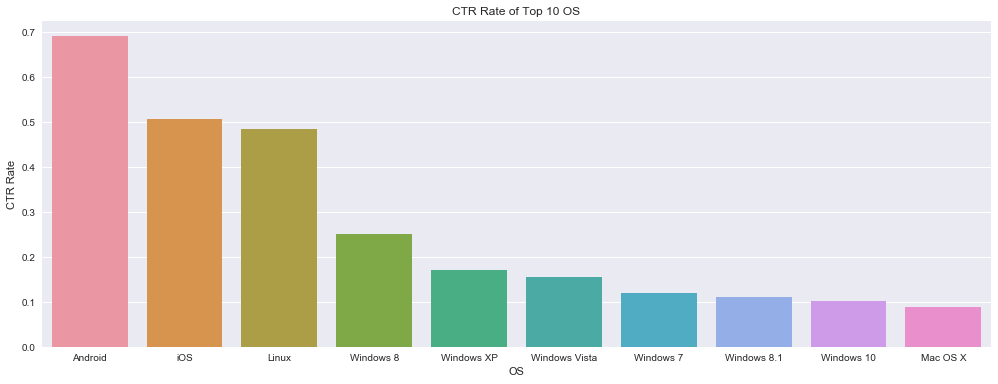

In [109]:
os_ctr_rate = (top_10_os_table[["ua_os_name", "c_cnt"]].groupby("ua_os_name").sum() / 
                   top_10_os_table[["ua_os_name", "c_cnt"]].groupby("ua_os_name").count())
os_ctr_rate.sort_values(by="c_cnt", inplace=True, ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(17, 6)
sns.barplot(x=os_ctr_rate.index.values, y=os_ctr_rate.c_cnt.values)
ax.set(xlabel='OS', ylabel='CTR Rate', title='CTR Rate of Top 10 OS')
plt.show()

## Feature Engineering and Model Creation 

In [3]:
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.feature_extraction import FeatureHasher

In [14]:
# Shuffle Data
combined = shuffle(combined)

In [4]:
combined = pd.read_pickle("./data/combined_days_processed")
day1_filtered = pd.read_pickle("./data/day1_filtered")

In [5]:
combined['keywords_split'] = combined['keywords'].apply(lambda lst: ' '.join(lst))
day1_filtered['keywords_split'] = day1_filtered['keywords'].apply(lambda lst: ' '.join(lst))

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(min_df=1000) #keep words that appear in at least 1000 documents
count_vec.fit(combined['keywords_split'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1000,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
combined_keywords_transform = count_vec.transform(combined['keywords_split']).toarray()

In [8]:
NUM_WORDS = combined_keywords_transform.shape[1]
NUM_WORDS

319

In [9]:
combined = pd.concat([combined, pd.DataFrame(combined_keywords_transform)], axis=1)

In [10]:
#Create subset of test set
idx = np.random.choice(day1_filtered.shape[0], size=500000, replace=False)
day1_subset = day1_filtered.iloc[idx]
click_spread = day1_subset.c_cnt.value_counts()
print("None-click to click ratio of sample:", int(click_spread[0] / click_spread[1]))

None-click to click ratio of sample: 1491


In [11]:
day1_keywords_transform = count_vec.transform(day1_subset['keywords_split']).toarray()

In [12]:
day1_subset = pd.concat([day1_subset.reset_index(drop=True), pd.DataFrame(day1_keywords_transform)], axis=1)

In [15]:
# combined.to_pickle("data/combined_days_processed")
# day1_subset.to_pickle("data/day1_filtered_subset")

Let's create our features:

In [16]:
#Features to one hot encode
FEATURES_TO_USE = ["advertiser_id", "ad_network_id", "geo_country_code3", "ua_os_name", 
                   "site_id", "ua_device", "campaign_id", "url_domain","geo_region_name", 
                   "red_domain", "pub_network_id", "geo_timezone", "ua_device_type", 
                   "ua_major", "ua_minor", "uuid"]

In [17]:
def transform_hour(x):
    """Assigns hour to a bin"""
    if x >= 5 and x < 8: return 1 #early morning 
    elif x >= 8 and x < 11: return 2 #morning 
    elif x >= 11 and x < 14: return 3 #midday
    elif x >= 14 and x < 19: return 4 #afternoon
    elif x >= 19 and x < 22: return 5 #evening
    else: return 6 #night
    
def create_numerical_features(sample):
    """Returns a dataframe with the necessary numberical features from dataframe sample"""
    df = pd.DataFrame()
    df["r_cnt"] = sample["r_cnt"].tolist()
    df["campaign_type"] = sample["campaign_type"].apply(lambda x: 1 if x == "private" else 0).tolist()
    df["ctr_rate"] = sample["ctr_rate"].tolist()
    df["num_ads_requested"] = sample["r_num_ads_requested"].tolist()
    df["hour"] = sample["i_timestamp"].astype(int).tolist()
    return df

def create_features(sample):
    """"Creates necessary features, returns X and y matrix"""
    X = create_numerical_features(sample)
    y = sample["c_cnt"]
    
    features = [] #store all features 
    features.append(X)
    for feature in FEATURES_TO_USE:
        encoded = encode_feature(feature, sample, df=combined)
        features.append(pd.DataFrame(encoded))
    
    return pd.concat(features, axis=1), y #combine all features

# FFM (inspired by https://www.csie.ntu.edu.tw/~cjlin/papers/ffm.pdf)

In [18]:
import xlearn as xl
xl.hello() #xl only prints in terminal

In [19]:
KEYWORDS_INDEX = 41 #start index of keywords columns

In [20]:
encoders = {} #cache the one hot encoders

In [ ]:
# Tracks number of columns per categorical feature, i.e. device_type has 4 columns (helps for conversion to FFM format)
feature_count = [] 

### Helper functions

In [21]:
# Create encoders and one hot encode features
def encode_feature(feature, sample, df, k=80):
    """Does limited one hot encoding (k most frequent) on the given feature from the sample dataframe. 
    If the one hot encoder for that specific feature doesn't exist, fit it to df first.
    
    Args:
        feature (str): the feature to one hot encode
        sample (dataframe): the dataframe that we encode the feature for
        df (dataframe): the dataframe that we fit the encoder to if it hasn't been created yet
        k (int): specifies top-k most frequent values to fit on
    
    Returns:
        the transformed feeature of the sample dataframe (2D array)
        
    """
    if feature not in encoders:
        encoder = preprocessing.LabelBinarizer()
        value_counts = df[feature].value_counts()
        encoder.fit(value_counts.iloc[:k].index.tolist()) #fit to k most frequent
        encoders[feature] = encoder #save that encoder for future use
    else:
        encoder = encoders[feature]
    return encoder.transform(sample[feature])

def create_numerical_features_ffm(sample):
    """Creates a dataframe with the necessary numberical features for the FFM model
    
    Args:
        sample (dataframe): the dataframe from which we create the numerical features 
    
    Returns:
        the dataframe with the numerical features
    """
    df = create_numerical_features(sample)
    #add the c_cnt column - the X and y values need to be part of the same matrix for FFM
    df = pd.concat([pd.DataFrame(sample["c_cnt"].tolist()), df], axis=1).reset_index(drop=True) 
    return df

def create_features_ffm(sample):
    """"Creates dataframe with the necessary features for the FFM model
    
    Args:
        sample (dataframe): the dataframe from which we create the features 
        
    Returns:
        the dataframe with the features
    """
    df = create_numerical_features_ffm(sample)
    features = [] #store all features 
    features.append(df)
    for feature in FEATURES_TO_USE:
        encoded = encode_feature(feature, sample, df=combined) #one hot encode the feature
        if len(feature_count) < len(FEATURES_TO_USE): feature_count.append(encoded.shape[1])
        features.append(pd.DataFrame(encoded))
        print(feature)
    features.append(sample.iloc[:, KEYWORDS_INDEX:]) #add the keywords columns
    return pd.concat(features, axis=1) #combine all transformed features

### FFM Data Processing

In [22]:
# Create training and validation matrix
train_ffm_transformed = create_features_ffm(combined)

advertiser_id
ad_network_id
geo_country_code3
ua_os_name
site_id
ua_device
campaign_id
url_domain
geo_region_name
red_domain
pub_network_id
geo_timezone
ua_device_type
ua_major
ua_minor
uuid


In [23]:
# Create test matrix
test_ffm_transformed = create_features_ffm(day1_subset)

advertiser_id
ad_network_id
geo_country_code3
ua_os_name
site_id
ua_device
campaign_id
url_domain
geo_region_name
red_domain
pub_network_id
geo_timezone
ua_device_type
ua_major
ua_minor
uuid


In [24]:
train_ffm_transformed.shape

(1000000, 1405)

In [25]:
test_ffm_transformed.shape

(500000, 1405)

In [27]:
# Generate list of numeric feature names
numerics = train_ffm_transformed.columns[1:6].tolist()
numerics

['r_cnt', 'campaign_type', 'ctr_rate', 'num_ads_requested', 'hour']

In [28]:
# Rename columns to make it easier to transform to FFM format
train_ffm_transformed.columns = ["c_cnt"] + numerics + list(range(6, ncolumns))
test_ffm_transformed.columns = ["c_cnt"] + numerics + list(range(6, ncolumns))

In [29]:
train_ffm_transformed.head()

c_cnt  r_cnt  campaign_type  ctr_rate  num_ads_requested  hour  6  7  8  9  \
0    0.0    0.0              1  0.047654               10.0    13  0  0  0  0   
1    0.0    0.0              1  0.047654               10.0    12  0  0  0  0   
2    0.0    0.0              1  0.047654               10.0    13  0  0  0  0   
3    0.0    0.0              1  0.047654               10.0    12  0  0  0  0   
4    0.0    1.0              1  0.047654                4.0    13  0  0  0  0   

   ...   1395  1396  1397  1398  1399  1400  1401  1402  1403  1404  
0  ...      0     0     0     0     0     0     0     0     0     0  
1  ...      0     0     0     0     0     0     0     0     0     0  
2  ...      0     0     0     0     0     0     0     0     0     0  
3  ...      0     0     0     0     0     0     0     0     0     0  
4  ...      0     0     0     0     0     0     0     0     0     0  

[5 rows x 1405 columns]

In [30]:
test_ffm_transformed.head()

c_cnt  r_cnt  campaign_type  ctr_rate  num_ads_requested  hour  6  7  8  9  \
0    0.0      1              1  0.000151                  4    18  0  0  0  0   
1    0.0      1              1  0.000151                  4    19  0  0  0  0   
2    0.0      1              0  0.008364                  1    21  0  0  0  0   
3    0.0      1              1  0.000151                 10    20  0  0  0  0   
4    0.0      1              1  0.000155                 10    20  0  0  0  0   

   ...   1395  1396  1397  1398  1399  1400  1401  1402  1403  1404  
0  ...      1     0     0     0     0     0     0     0     0     0  
1  ...      0     0     0     0     0     0     0     0     0     0  
2  ...      0     0     0     0     0     0     0     0     0     0  
3  ...      0     0     0     0     0     0     0     0     0     0  
4  ...      0     0     0     0     0     0     0     0     0     0  

[5 rows x 1405 columns]

We will use Dask to convert the data to text files to feed into the FFM model (http://dask.pydata.org/en/latest/). It allows us to parallelize the conversion process (otherwise, it's insanely slow).

In [ ]:
ncolumns = train_ffm_transformed.columns.shape[0]
feature_count += [1 for _ in range(NUM_WORDS)] #add 1 for each keyword
len(feature_count) # number of categorical features

In [31]:
def convert_to_ffm_parallel(row):
    """Converts row to ffm format"""
    ncols = row.shape[0]
    datastring = ""
    datastring += str(int(row['c_cnt']))
    field_position = 0
    feature_count_index = 0
    for i in range(1, ncols):
        if field_position == feature_count[feature_count_index]:
            feature_count_index += 1
            field_position = 0
        # For numerical fields, we are creating a dummy field here
        if (i - 1) < len(numerics):
            #we are dealing with a numeric feature
            feat = numerics[i - 1]
            datastring = datastring + " "+str(i - 1)+":"+ str(i - 1)+":"+ str(row[feat])
        else:
            #categorical feature
            if row[i] == 1:
                datastring = datastring + " "+str(feature_count_index + 5)+":"+ str(i - 1)+":1"
            field_position += 1
    return datastring        
    
def apply_func(df):
    """Applies functions to df"""
    return df.apply(lambda row: convert_to_ffm_parallel(row), axis=1)
  

In [32]:
import dask.dataframe as dd
from dask.multiprocessing import get
import time

ncores = 4 
dask_train_ffm = dd.from_pandas(train_ffm_transformed[:600000], npartitions=ncores)

Actual conversions; we will time how long it takes as well

In [33]:
t0 = time.time()
converted_train = dask_train_ffm.map_partitions(apply_func).compute(get=get) #convert training data
t1 = time.time()
print("Time:", t1-t0)

Time: 3351.321110010147


In [35]:
dask_test_ffm = dd.from_pandas(test_ffm_transformed, npartitions=ncores)

In [36]:
t0 = time.time()
converted_test = dask_test_ffm.map_partitions(apply_func).compute(get=get) #convert test data
t1 = time.time()
print("Time:", t1-t0)

Time: 2759.911721229553


In [37]:
# Convert to text files
with open("ffm/train_dask_ffm.txt", "w") as text_file:
    text_file.write(converted_train.str.cat(sep='\n'))
    
with open("ffm/test_dask_ffm.txt", "w") as text_file:
    text_file.write(converted_test.str.cat(sep='\n'))

### Hyperparameter Tuning for FFM

Split the training data into training and validation for hyperparameter tuning:

In [59]:
train = pd.read_csv('ffm/train_dask_ffm.txt', header = None)
train = shuffle(train)

In [60]:
train_size = int(0.9 * train.shape[0])
train_ffm, val_ffm = train[:train_size], train[train_size:]
np.savetxt('ffm/train_dask_ffm_sliced.txt', train_ffm.values, fmt='%s')
np.savetxt('ffm/val_dask_ffm_sliced.txt', val_ffm.values, fmt='%s')

In [75]:
y_val_true = pd.to_numeric(val_ffm[0].str[0]).tolist() #get the c_cnt column

In [78]:
epochs = 10

In [77]:
ffm_model = xl.create_ffm()  
ffm_model.setTrain("ffm/train_dask_ffm_sliced.txt")   # Training data
ffm_model.setValidate("ffm/val_dask_ffm_sliced.txt")  # Validation data
ffm_model.setTest("ffm/val_dask_ffm_sliced.txt") # Test data
# ffm_model.setSigmoid() #makes outputs between 0 and 1
ffm_model.disableEarlyStop();
ffm_model.setSign() #makes outputs either 0 or 1

# param:
#  0. binary classification
#  1. learning rate
#  2. regularization lambda 
#  3. Metric for monitoring validation set performance 
#  4. Maximum number of Epochs
#  5. Length of latent vector for each feature

best_f1 = float('-inf')
for lr in np.linspace(0.05, 1, num=7):
    for lmbda in np.linspace(0.0001, 0.001, num=7):
        param = {'task':'binary', 'lr':lr, 'lambda':lmbda,'metric':'auc','epoch':epochs, 'k':8}
        # Train model
        ffm_model.fit(param, "ffm/dask_model.out")
        ffm_model.predict("ffm/dask_model.out", "ffm/dask_output.txt") #predicts on validation data
        y_pred_ffm = pd.read_csv('ffm/dask_output.txt', header = None)
        current_f1 = f1_score(y_val_true, y_pred_ffm)
        if current_f1 > best_f1:
            best_f1, best_lr, best_lmbda = current_f1, lr, lmbda

In [79]:
print("Best F1: %f, Best learning rate: %f, Best lambda: %f" % (best_f1, best_lr, best_lmbda))

Best F1: 0.901571, Best learning rate: 1.000000, Best lambda: 0.000100


### Training and testing FFM model

We are testing on CPC data only, training data consists of both CPC and CPM data so that we can have more positive samples

In [90]:
# Training task
ffm_model = xl.create_ffm()  
ffm_model.setTrain("ffm/train_dask_ffm.txt")   
ffm_model.setValidate("ffm/test_dask_ffm.txt") 
ffm_model.setTest("ffm/test_dask_ffm.txt") 
# ffm_model.setSigmoid()
ffm_model.disableEarlyStop();
ffm_model.setSign() 

param = {'task':'binary', 'lr':best_lr, 'lambda':best_lmbda,'metric':'auc','epoch':epochs, 'k':8}
# Train model
ffm_model.fit(param, "ffm/dask_model.out")
ffm_model.predict("ffm/dask_model.out", "ffm/dask_output.txt") #predicts on validation data
y_pred_ffm = pd.read_csv('ffm/dask_output.txt', header = None)
y_true_ffm = test_ffm_transformed['c_cnt']
confusion_ffm = confusion_matrix(y_true_ffm, y_pred_ffm) #00 - TN, 10 - FN, 01 - FP, 11 - TP
print("FFM Confusion Matrix:\n", confusion_ffm)

precision_ffm = confusion_ffm[1][1] / (confusion_ffm[1][1] + confusion_ffm[0][1])
recall_ffm = confusion_ffm[1][1] / (confusion_ffm[1][1] + confusion_ffm[1][0])
print("FFM Precision:", precision_ffm)
print("FFM Recall:", recall_ffm)

print("FFM F1 Score:", f1_score(test_ffm_transformed['c_cnt'], y_pred_ffm)) #better F1 score!

FFM Confusion Matrix:
 [[487792  11873]
 [   264     71]]
FFM Precision: 0.00594440723376
FFM Recall: 0.211940298507
FFM F1 Score: 0.0115644596466


Train an ensemble of FFMs:

In [91]:
#Create an ensemble of ffms
NUM_ENSEMBLES = 10
ffm_models = []
for i in range(NUM_ENSEMBLES):
    sample = train.sample(n=train.shape[0], replace=True) #train on a subset of the data (sample with replacement)
    file_name = 'ffm/train_dask_ffm_' + str(i) + '.txt'
    np.savetxt(file_name, sample.values, fmt='%s')
    ffm = xl.create_ffm()
    ffm.setTrain(file_name)   # Training data
    ffm.setValidate("ffm/test_dask_ffm.txt")  # Validation data
    ffm.setTest("ffm/test_dask_ffm.txt") # Test data
    ffm.disableEarlyStop();
    ffm.setSign() #makes outputs either 0 or 1
    ffm_models.append(ffm)

In [92]:
#Train the ensembles
param = {'task':'binary', 'lr':best_lr, 'lambda':best_lmbda,'metric':'auc','epoch':epochs, 'k':8}
predictions = np.zeros((NUM_ENSEMBLES, test_ffm_transformed.shape[0]))
for i in range(NUM_ENSEMBLES):
    output_name = 'ffm/dask_model_'  + str(i) + '.out'
    prediction_name = "ffm/dask_output_" + str(i) + ".txt"
    model = ffm_models[i]
    model.fit(param, output_name)
    model.predict(output_name, prediction_name)
    y_pred_ffm = pd.read_csv(prediction_name, header = None)
    predictions[i, :] = y_pred_ffm.values.flatten()


In [94]:
#Average the predictions
avg_predictions = np.round(np.mean(predictions, axis=0))
confusion_ffm = confusion_matrix(y_true_ffm, avg_predictions) #00 - TN, 10 - FN, 01 - FP, 11 - TP
print("FFM Confusion Matrix:\n", confusion_ffm)

precision_ffm = confusion_ffm[1][1] / (confusion_ffm[1][1] + confusion_ffm[0][1])
recall_ffm = confusion_ffm[1][1] / (confusion_ffm[1][1] + confusion_ffm[1][0])
print("FFM Precision:", precision_ffm)
print("FFM Recall:", recall_ffm)
print("F1 score of FFM ensembles: %f" % f1_score(test_ffm_transformed['c_cnt'], avg_predictions))

FFM Confusion Matrix:
 [[488281  11384]
 [   264     71]]
FFM Precision: 0.00619816673942
FFM Recall: 0.211940298507
F1 score of FFM ensembles: 0.012044
